This is Supervised Machine Learning problem. Let's follow these them.

# Steps
- Import data
- Exploratory Data Analysis
- Preprocess
- Model & Validation
- Conclusion

## Step1: Import data


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

df = pd.read_csv("./data/heart.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [2]:
## Let see basic distribution for each data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
## See data examples
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: >

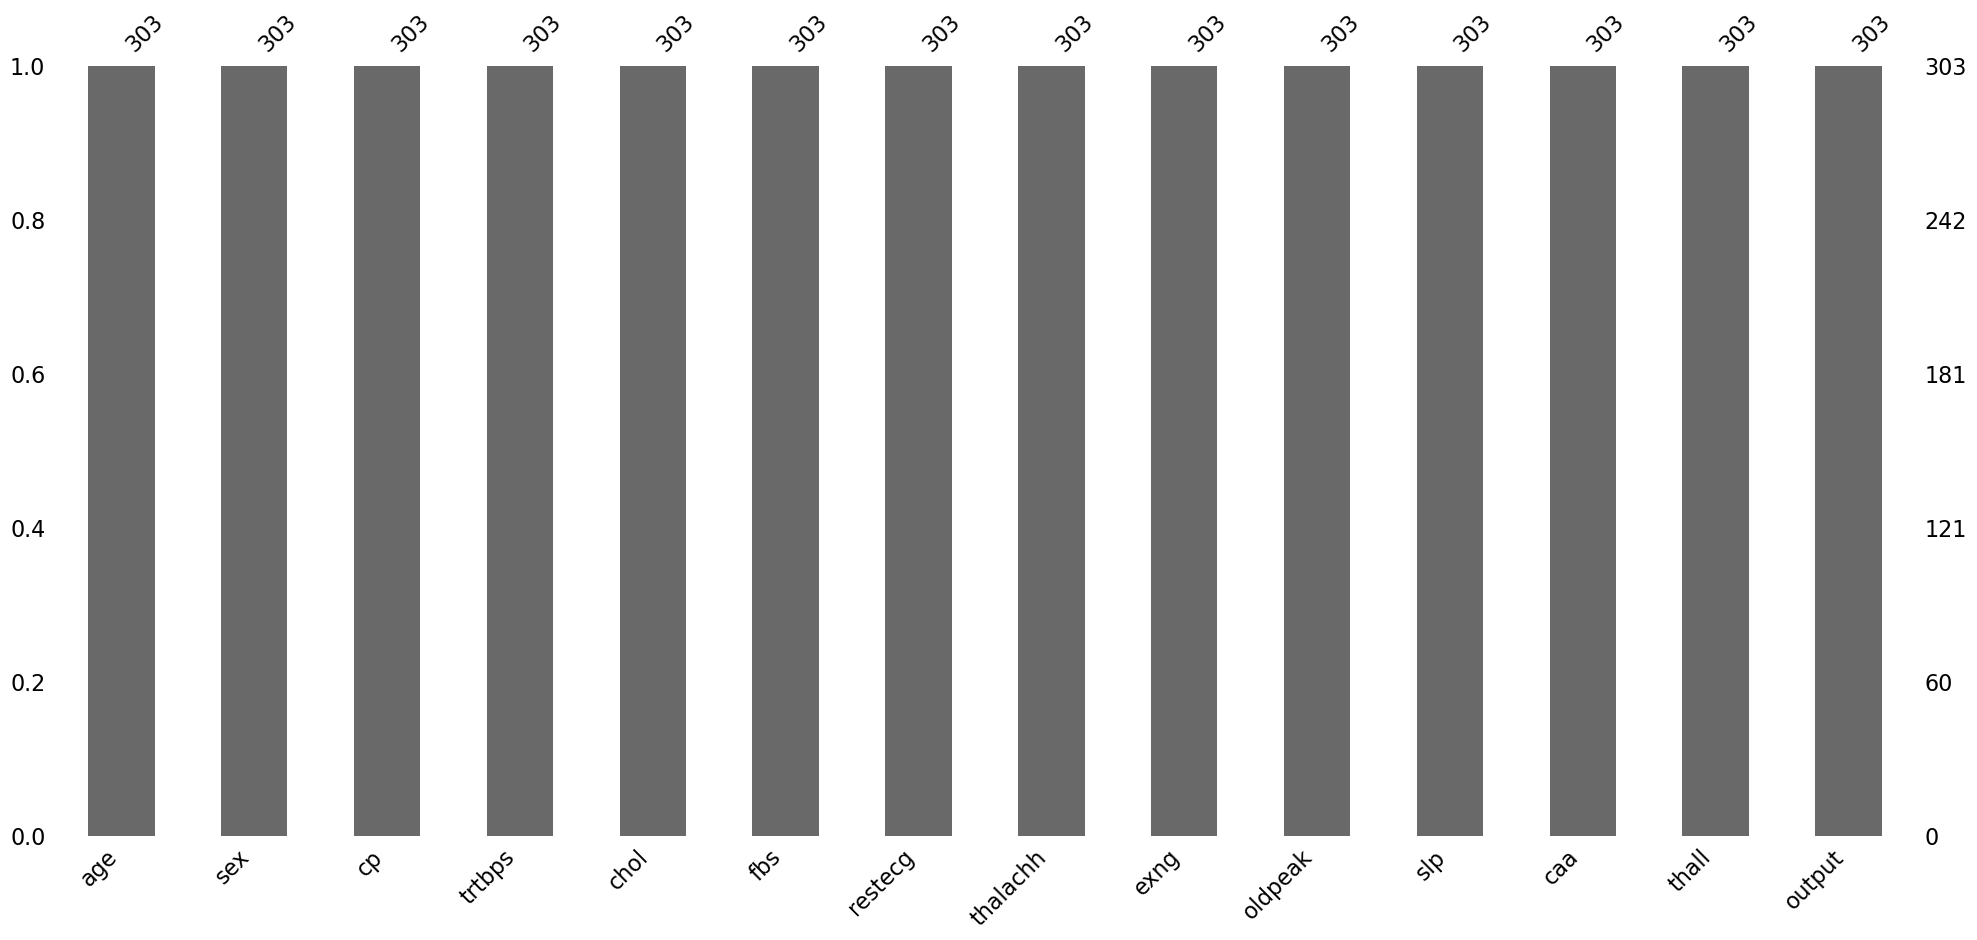

In [4]:
## Check missing data
import missingno as msno

msno.bar(df=df)
# So missing value, so that's good.

In [5]:
# Check unique value
for col in df.columns:
    series = df[col]
    unique = series.unique().size
    print(f'The unique value of field {col} is {unique}')

The unique value of field age is 41
The unique value of field sex is 2
The unique value of field cp is 4
The unique value of field trtbps is 49
The unique value of field chol is 152
The unique value of field fbs is 2
The unique value of field restecg is 3
The unique value of field thalachh is 91
The unique value of field exng is 2
The unique value of field oldpeak is 40
The unique value of field slp is 3
The unique value of field caa is 5
The unique value of field thall is 4
The unique value of field output is 2


In [6]:
# Check if data is balanced

negative_count = (df['output'] == 0).sum()
positive_count = (df['output'] == 1).sum()

print(f'from total data set size {len(df)}, count of output negative is {negative_count}, positive is {positive_count}')

# not that bad, we don't need to balance it

from total data set size 303, count of output negative is 138, positive is 165


In [7]:
# Split features and output
features = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']

X_features = df[features]
y = df['output']

X_features.columns


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

## Step2: Exploratory Data Analysis

Feature type
- age numerical discrete
- sex categorical norminal
- cp categorical norminal
- trtbps numerical discrete
- chol numerical discrete
- fbs categorical norminal
- restecg categorical norminal
- thalachh numerical discrete
- exng categorical norminal
- oldpeak numerical continuous

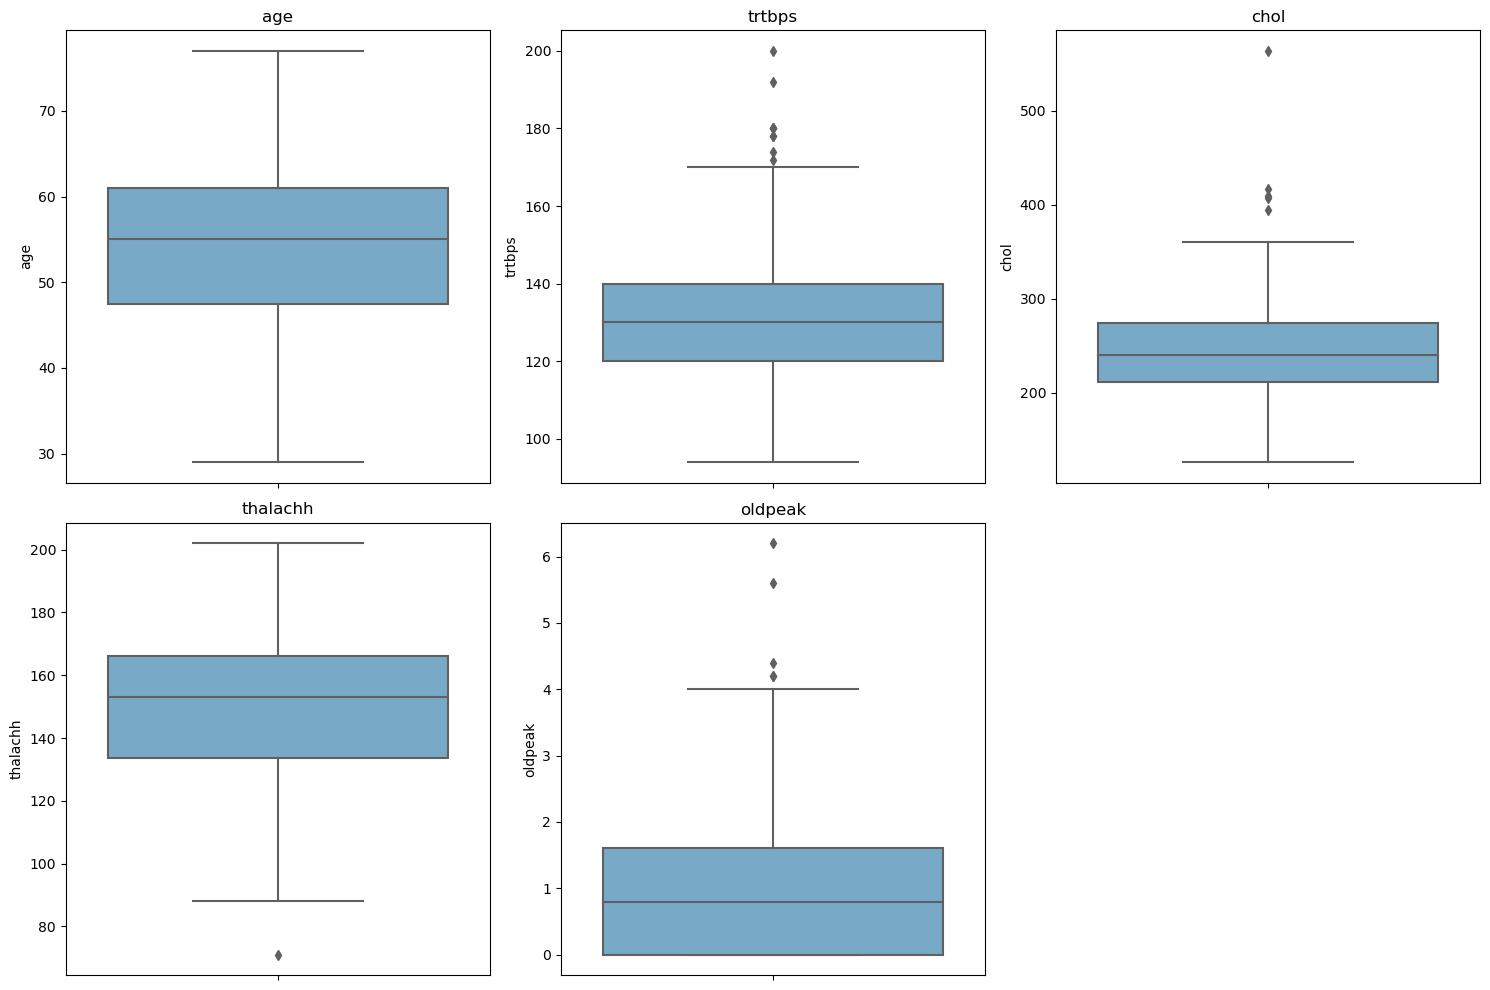

In [8]:
# Univariate
# Box plot, this is good for dicover outliers

import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

plt.figure(figsize=(15,10))
sns.set_palette('Set1')
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=X_features[col], palette="Blues")
    plt.title(col)

plt.tight_layout()
plt.show()

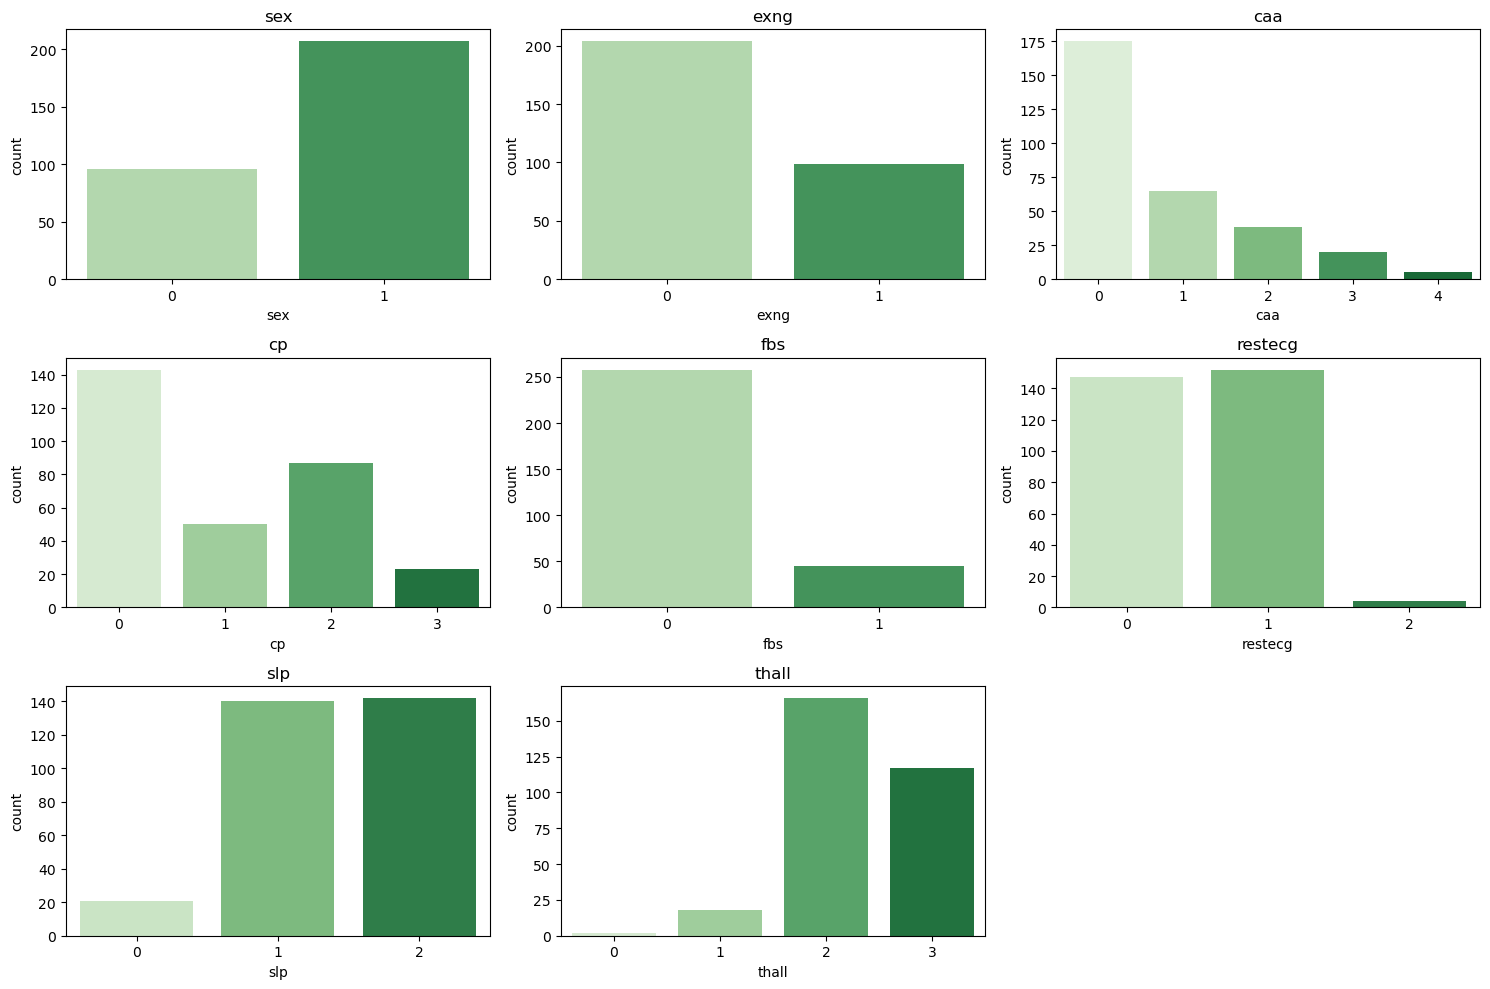

In [9]:
categoical_features = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']

plt.figure(figsize=(15,10))
sns.set_palette('Set1')
for i, col in enumerate(categoical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=X_features[col], palette="Greens")
    plt.title(col)

plt.tight_layout()
plt.show()

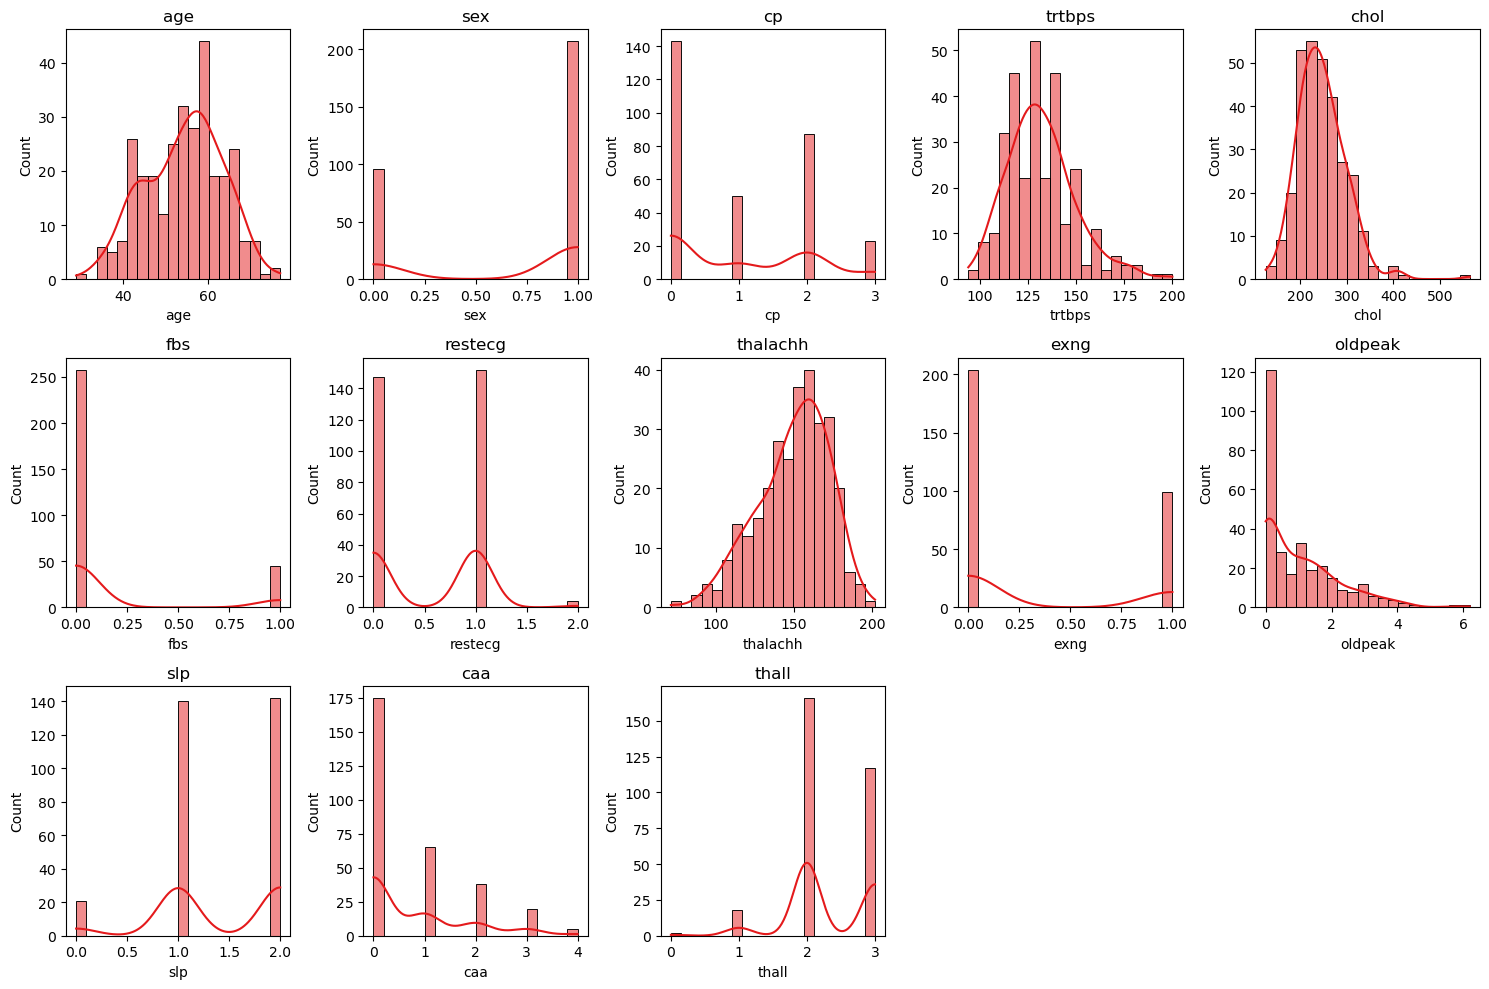

In [10]:
# Histrogram plot
plt.figure(figsize=(15,10))
sns.set_palette('Set1')
for i, col in enumerate(features, 1):
    plt.subplot(3, 5, i)
    sns.histplot(data=X_features, x=col, kde=True, bins = 20)
    plt.title(col)

plt.tight_layout()
plt.show()


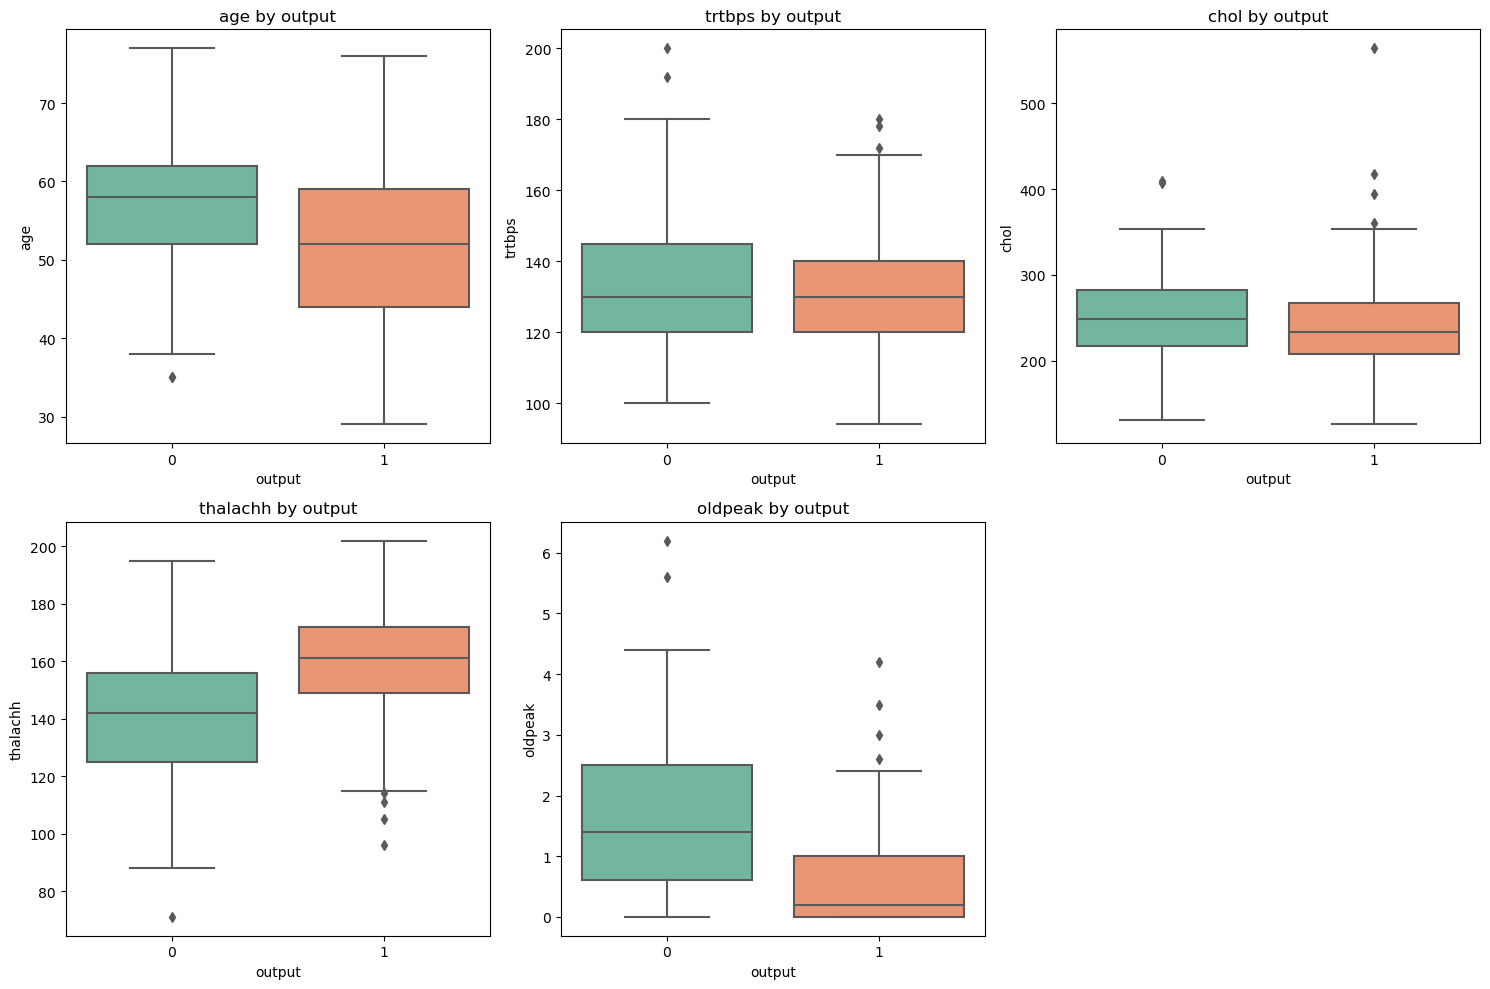

In [11]:
# Bivariate

# Box plot side by side
# Let's compare with 'output'

plt.figure(figsize=(15,10))
sns.set_palette('Set2')

for i, col in enumerate(numerical_features, 1):
    plt.subplot(2,3,i)
    sns.boxplot(x='output', y=col, data=df)
    plt.title(f"{col} by output")

plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

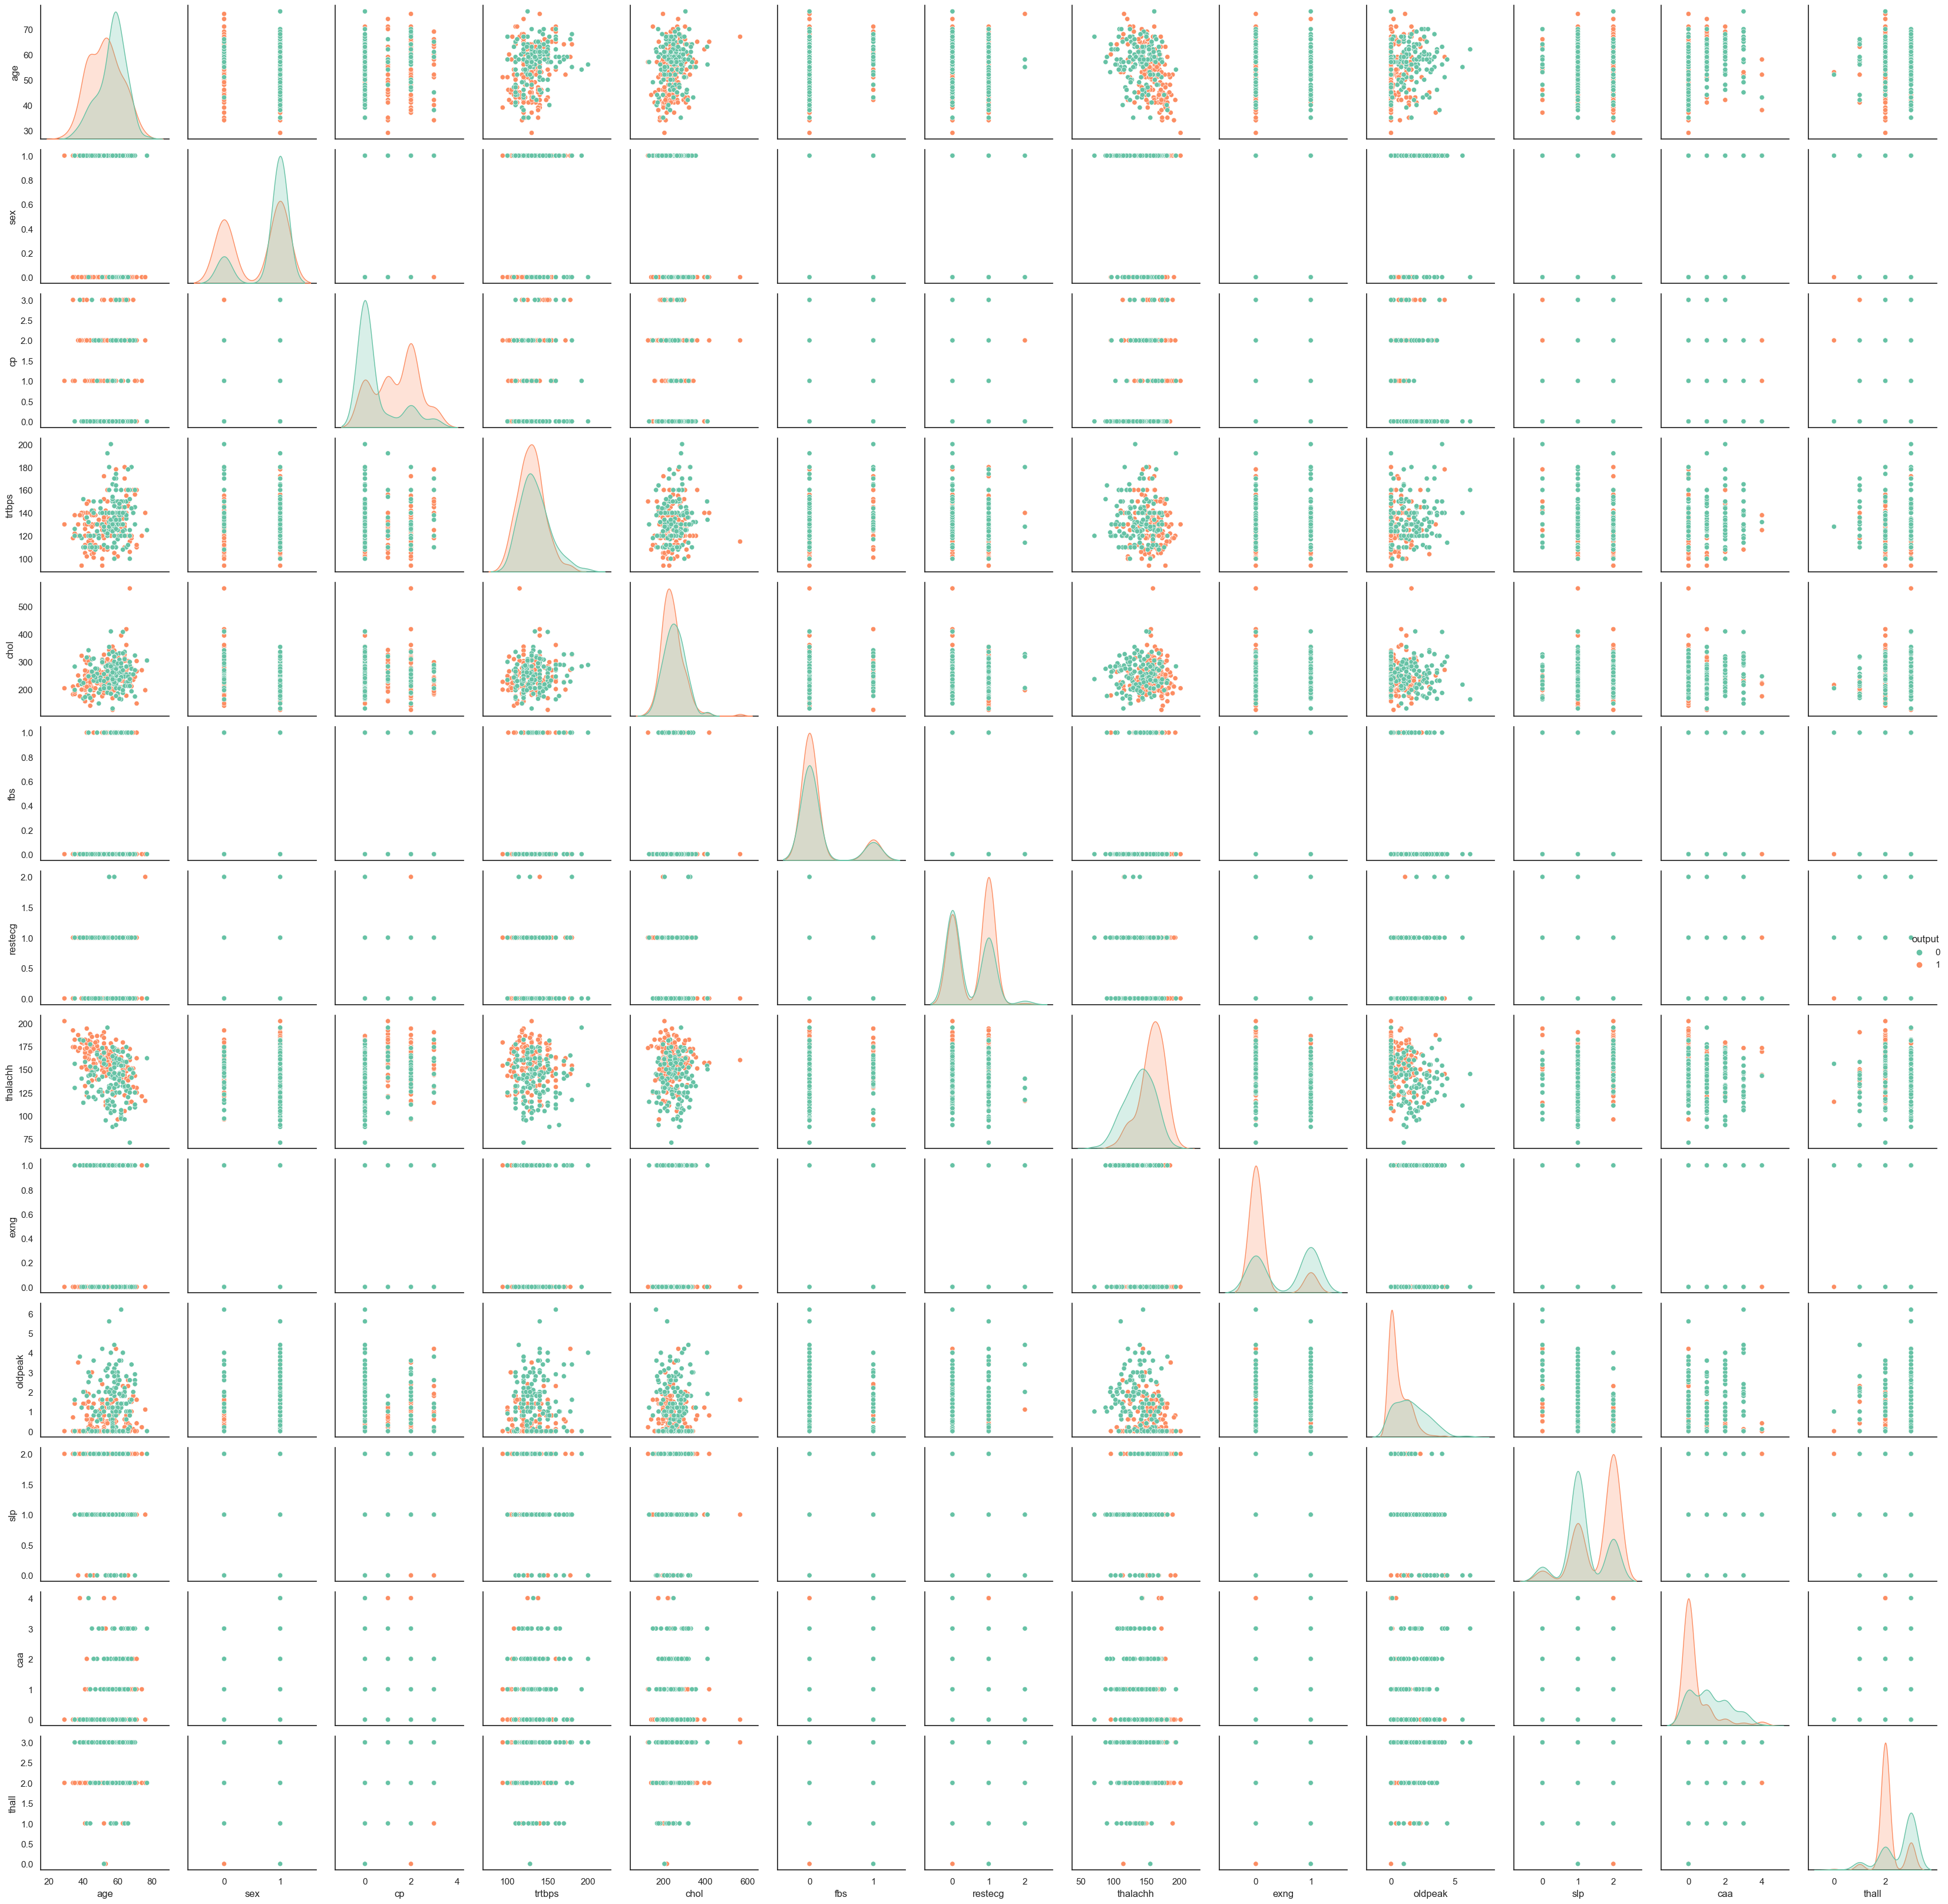

In [12]:
## Joint plot

plt.figure(figsize=(8,8))
sns.set_theme(style="white")


plt.figure(figsize=(15,10))
sns.set_palette('Set2')

# sns.jointplot(x='age', y='oldpeak', hue='output', data=df, palette='tab10', s=9)
sns.pairplot(df, hue='output')

plt.tight_layout()
plt.show()

## with 13 dimension, it's a quite overwhelming to plot like this.

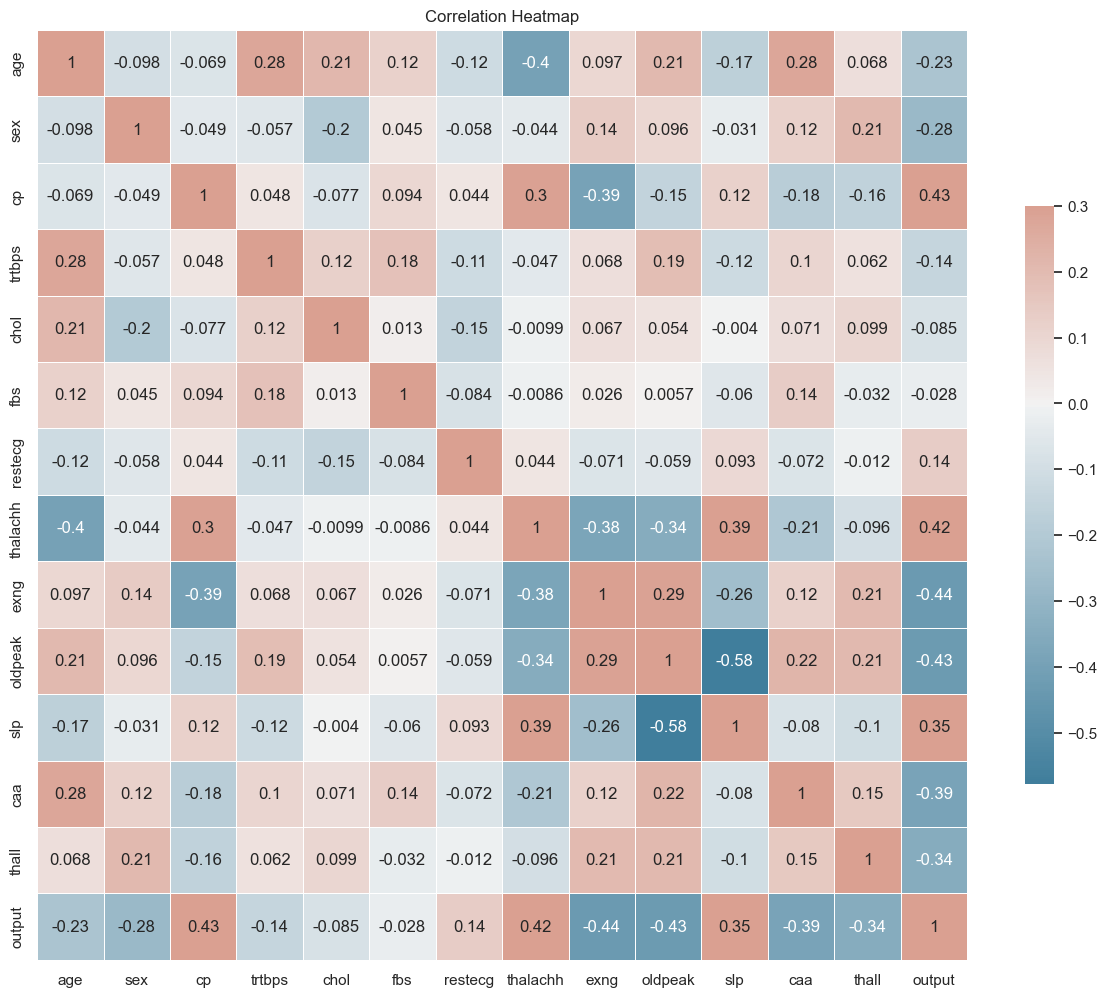

In [13]:
# Correlation heatmap

import numpy as np

corr = df.corr()

plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=0.3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()



### Summary from EDA

- Data is cleaned, no Nan value.
- There are outliers in numerical features.
- 
- From both box plot by output and correlation heatmap
  - cp, thalachh, and slp have a possitive correlation with output
  - exng, oldpeak, caa, thall, age, and sex have a negative correlation with output

## Step3: Preprocess

### Null handling -> Since we don't have null value here, so it's fine
- Filter out
- Imputation
### Feature scaling -> let's do robost scaling and standardization on age, trtbps, chol, thalachh, and oldpeak
- Normalization
- Standardization
- Robust scaling
### Handling Categorical Variables -> Let's do One hot encoding since all of them are norminal
- Label Encoding
- One Hot Encoding

Then finally we can, split test and train data.

In [14]:
from sklearn.preprocessing import RobustScaler, StandardScaler

numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

df_scaled = df.copy(deep=True)

robost_scaler = RobustScaler()
df_scaled[numerical_features] = robost_scaler.fit_transform(df_scaled[numerical_features])

standard_scaler = StandardScaler()

df_scaled[numerical_features] = standard_scaler.fit_transform(df_scaled[numerical_features])

df_scaled.describe() # They should be scaled already.

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,3.030000e+02,303.000000,303.000000,303.000000,3.030000e+02,303.000000,303.000000,303.000000,303.000000,3.030000e+02,303.000000,303.000000,303.000000,303.000000
mean,-7.035077e-17,0.683168,0.966997,0.000000,1.612205e-17,0.148515,0.528053,0.000000,0.326733,-4.690051e-17,1.399340,0.729373,2.313531,0.544554
std,1.001654e+00,0.466011,1.032052,1.001654,1.001654e+00,0.356198,0.525860,1.001654,0.469794,1.001654e+00,0.616226,1.022606,0.612277,0.498835
min,-2.797624e+00,0.000000,0.000000,-2.148802,-2.324160e+00,0.000000,0.000000,-3.439267,0.000000,-8.968617e-01,0.000000,0.000000,0.000000,0.000000
25%,-7.572802e-01,0.000000,0.000000,-0.663867,-6.814943e-01,0.000000,0.000000,-0.706111,0.000000,-8.968617e-01,1.000000,0.000000,2.000000,0.000000
50%,6.988599e-02,1.000000,1.000000,-0.092738,-1.210553e-01,0.000000,1.000000,0.146634,0.000000,-2.067053e-01,1.000000,0.000000,2.000000,1.000000
75%,7.316189e-01,1.000000,2.000000,0.478391,5.456738e-01,0.000000,1.000000,0.715131,1.000000,4.834512e-01,2.000000,1.000000,3.000000,1.000000
max,2.496240e+00,1.000000,3.000000,3.905165,6.140401e+00,1.000000,2.000000,2.289429,1.000000,4.451851e+00,2.000000,4.000000,3.000000,1.000000


In [15]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)


In [16]:
def display_confustion_metric(conf_matrix):
    plt.figure(figsize=(10, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

## Step4: Model & Validation

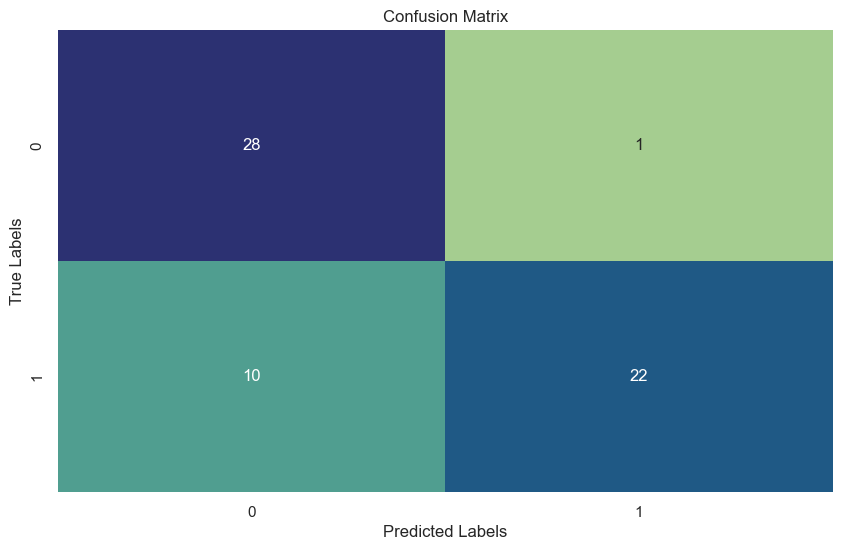

Accuracy of DecisionTreeClassifier is 81.9672131147541


In [17]:


# Tree-based classification

# - DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


dt = DecisionTreeClassifier()

hyperparam_dist_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

randomized_search_dt = RandomizedSearchCV(
    dt,
    param_distributions=hyperparam_dist_dt,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

randomized_search_dt.fit(X_train, y_train)


best_dt_model = randomized_search_dt.best_estimator_

dt_y_predict = best_dt_model.predict(X_test)

dt_acc_score = accuracy_score(y_true=y_test,y_pred=dt_y_predict)
dt_conf_matrix = confusion_matrix(y_true=y_test, y_pred=dt_y_predict)

best_param_dt = randomized_search_dt.best_params_

display_confustion_metric(dt_conf_matrix)
print(f'Accuracy of DecisionTreeClassifier is {dt_acc_score * 100}')

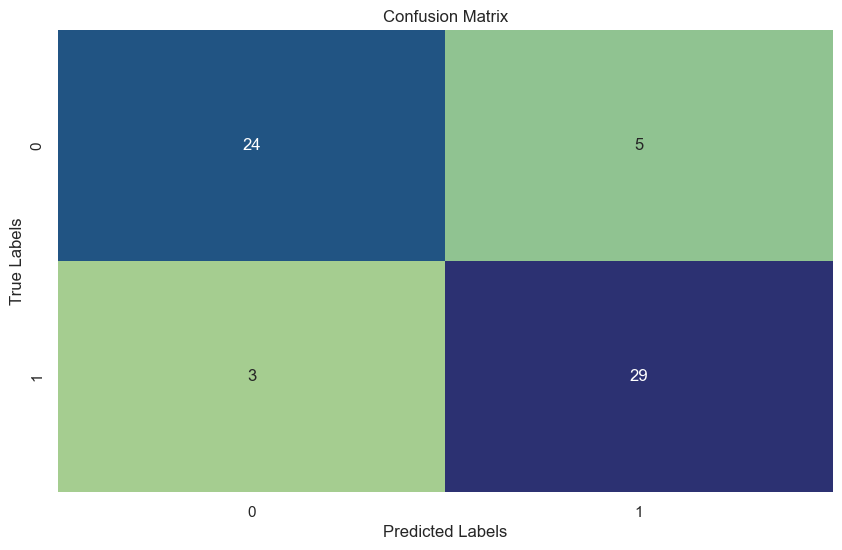

Accuracy of RandomForestClassifier is 86.88524590163934


In [18]:
# - RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

hyperparam_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

randomized_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=hyperparam_dist_rf,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

randomized_search_rf.fit(X_train, y_train)


best_rf_model = randomized_search_rf.best_estimator_

rf_y_predict = best_rf_model.predict(X_test)

rf_acc_score = accuracy_score(y_true=y_test,y_pred=rf_y_predict)
rf_conf_matrix = confusion_matrix(y_true=y_test, y_pred=rf_y_predict)

best_param_rf = randomized_search_rf.best_params_

display_confustion_metric(rf_conf_matrix)
print(f'Accuracy of RandomForestClassifier is {rf_acc_score * 100}')

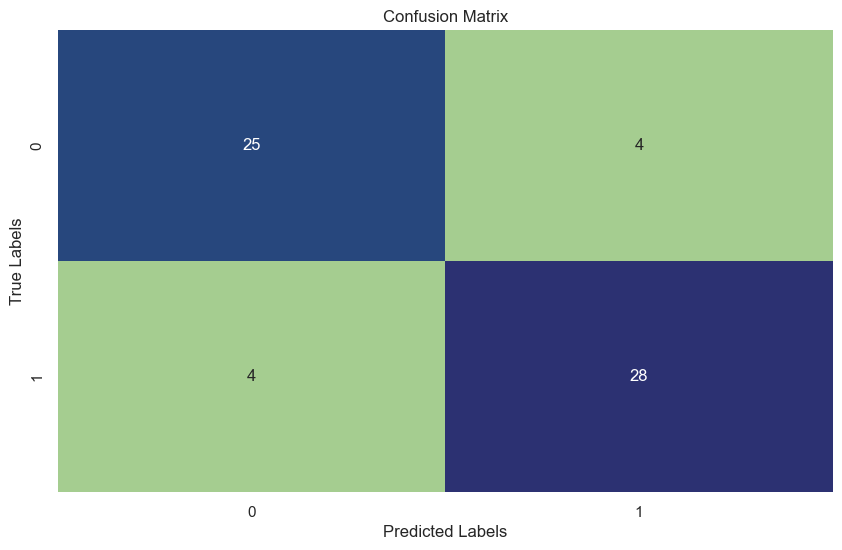

Accuracy of XGBClassifier is 86.88524590163934


In [19]:
# - XGBClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier

xgb = XGBClassifier()

hyperparam_dist_xgb = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [1, 1.1, 1.2, 1.3],
}

randomized_search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=hyperparam_dist_xgb,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

randomized_search_xgb.fit(X_train, y_train)

best_xgb_model = randomized_search_xgb.best_estimator_

xgb_y_predict = best_xgb_model.predict(X_test)

xgb_acc_score = accuracy_score(y_true=y_test,y_pred=xgb_y_predict)
xgb_conf_matrix = confusion_matrix(y_true=y_test, y_pred=xgb_y_predict)

best_param_xgb = randomized_search_xgb.best_params_

display_confustion_metric(xgb_conf_matrix)
print(f'Accuracy of XGBClassifier is {xgb_acc_score * 100}')

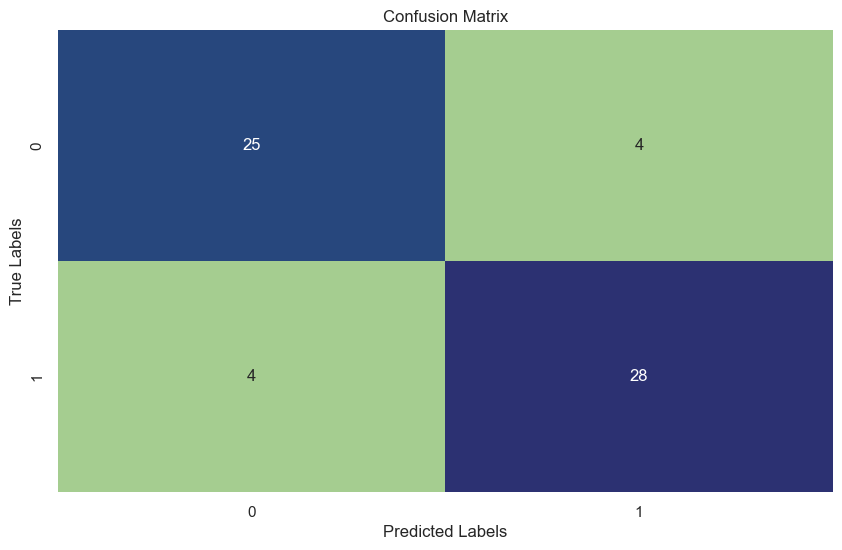

Accuracy of C-Support Vector Classification is 86.88524590163934


In [20]:
# Non Tree-based classification
# - C-C-C-C-C-C-C-C-C-C-C-Support Vector Classification (SVC)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

svc = SVC()

hyperparam_dist_svc = {
    'C': [0.1, 1, 3, 5, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

randomized_search_svc = RandomizedSearchCV(
    svc,
    param_distributions=hyperparam_dist_svc,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

randomized_search_svc.fit(X_train, y_train)

best_svc_model = randomized_search_svc.best_estimator_

svc_y_predict = best_svc_model.predict(X_test)

svc_acc_score = accuracy_score(y_true=y_test,y_pred=svc_y_predict)
svc_conf_matrix = confusion_matrix(y_true=y_test, y_pred=svc_y_predict)

best_param_svc = randomized_search_svc.best_params_

display_confustion_metric(svc_conf_matrix)
print(f'Accuracy of C-Support Vector Classification is {svc_acc_score * 100}')

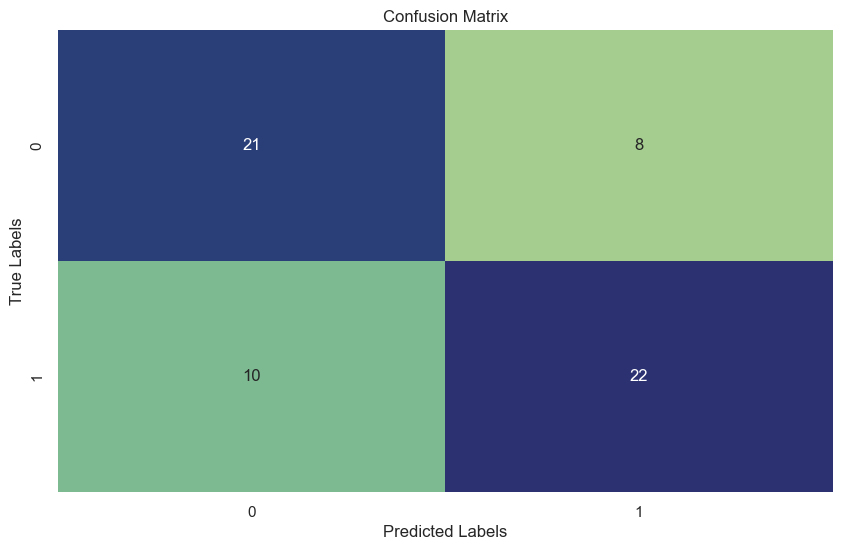

Accuracy of Support K-Neighbors Classifier is 70.49180327868852


In [21]:
# K-Neighbors Classifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

hyperparam_dist_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40],
    'p': [1, 2],
}

randomized_search_knn = RandomizedSearchCV(
    knn,
    param_distributions=hyperparam_dist_knn,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

randomized_search_knn.fit(X_train, y_train)

best_knn_model = randomized_search_knn.best_estimator_

knn_y_predict = best_knn_model.predict(X_test)

knn_acc_score = accuracy_score(y_true=y_test,y_pred=knn_y_predict)
knn_conf_matrix = confusion_matrix(y_true=y_test, y_pred=knn_y_predict)

best_param_knn = randomized_search_knn.best_params_

display_confustion_metric(knn_conf_matrix)
print(f'Accuracy of Support K-Neighbors Classifier is {knn_acc_score * 100}')

/opt/homebrew/Caskroom/miniconda/base/envs/iris-course/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniconda/base/envs/iris-course/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

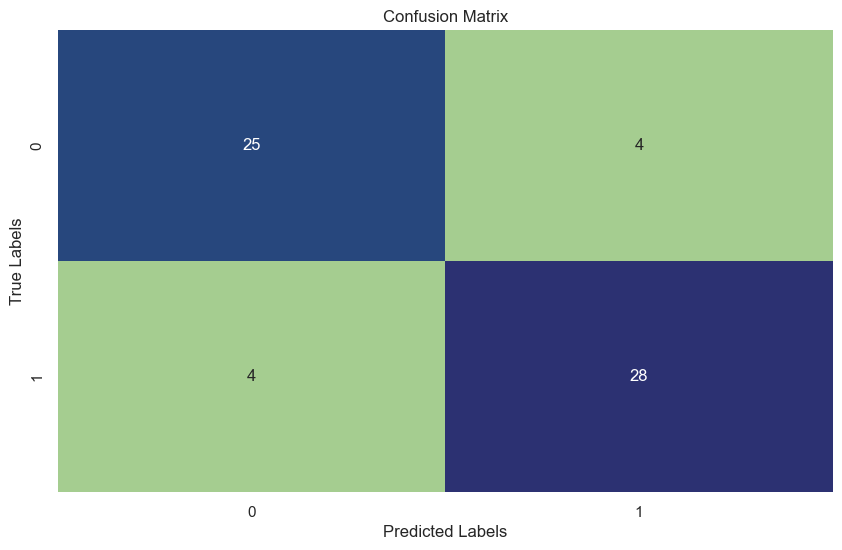

Accuracy of Support LogisticRegression Classifier is 86.88524590163934


In [22]:
# LogisticRegression

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

hyperparam_dist_logreg = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'C': [100, 10, 1.0, 0.1, 0.01],
    'max_iter': [1000]
}

randomized_search_logreg = RandomizedSearchCV(
    logreg,
    param_distributions=hyperparam_dist_logreg,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

randomized_search_logreg.fit(X_train, y_train)

best_logreg_model = randomized_search_logreg.best_estimator_

logreg_y_predict = best_logreg_model.predict(X_test)

logreg_acc_score = accuracy_score(y_true=y_test,y_pred=logreg_y_predict)
logreg_conf_matrix = confusion_matrix(y_true=y_test, y_pred=logreg_y_predict)

best_param_logreg = randomized_search_logreg.best_params_

display_confustion_metric(logreg_conf_matrix)
print(f'Accuracy of Support LogisticRegression Classifier is {logreg_acc_score * 100}')

## Step5: Conclusion

- Accuracy of DecisionTreeClassifier is 81.9672131147541
- Accuracy of RandomForestClassifier is 86.88524590163934
- Accuracy of XGBClassifier is 86.88524590163934
- Accuracy of C-Support Vector Classification is 86.88524590163934
- Accuracy of Support K-Neighbors Classifier is 70.49180327868852
- Accuracy of Support LogisticRegression Classifier is 86.88524590163934

The best model here are RandomForestClassifier, XGBClassifier, C-Support Vector Classification, and LogisticRegression with accuracy of 86.8852%
Let's pick C-Support Vector Classification as final champion.

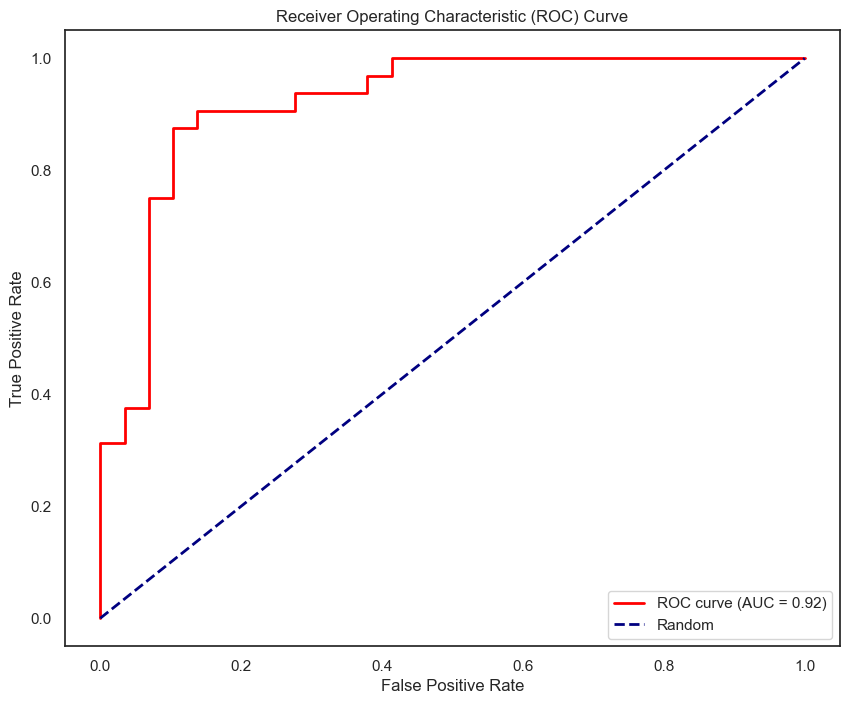

In [23]:
from sklearn.metrics import roc_curve, auc

y_prob = best_svc_model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()